# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing Necessary Libraries**

In [ ]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [ ]:
# Importing the file porter_data_1.csv
delivery = pd.read_csv('/content/drive/MyDrive/porter_data_1.csv')

In [ ]:
delivery.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [ ]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [ ]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

delivery['created_at'] = pd.to_datetime(delivery['created_at'])
delivery['actual_delivery_time'] = pd.to_datetime(delivery['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [ ]:
# Convert categorical features to category type
delivery['market_id'] = delivery['market_id'].astype('category')
delivery['store_primary_category'] = delivery['store_primary_category'].astype('category')
delivery['order_protocol'] = delivery['order_protocol'].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [ ]:
# Calculate time taken in minutes
delivery['time_taken'] = (delivery['actual_delivery_time'] - delivery['created_at']).dt.total_seconds() / 60

In [ ]:
delivery.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken'],
      dtype='object')

<Figure size 1200x1000 with 0 Axes>

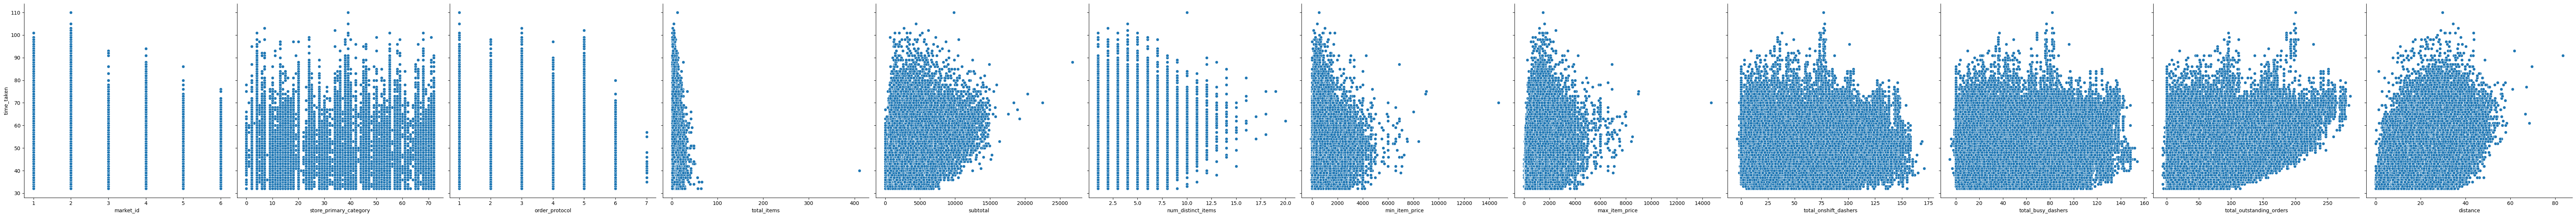

In [ ]:
plt.figure(figsize=(12, 10))
sns.pairplot(delivery, x_vars = (['market_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance']),y_vars = 'time_taken' , height = 6 ,kind = 'scatter')
plt.show()

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [ ]:
# Extract the hour and day of week from the 'created_at' timestamp
delivery['hour'] = delivery['created_at'].dt.hour
delivery['day_of_week'] = delivery['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
delivery['isWeekend'] = delivery['day_of_week'].apply(lambda x: 1 if x >=5 else 0)


In [ ]:
# Drop unnecessary columns
delivery.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)

In [ ]:
delivery.columns


Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken', 'hour',
       'day_of_week', 'isWeekend'],
      dtype='object')

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [ ]:
# Define target variable (y) and features (X)
y = delivery['time_taken']
X = delivery.drop('time_taken', axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [ ]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation
x_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 97659 to 15725
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  category
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   total_items               140621 non-null  int64   
 4   subtotal                  140621 non-null  int64   
 5   num_distinct_items        140621 non-null  int64   
 6   min_item_price            140621 non-null  int64   
 7   max_item_price            140621 non-null  int64   
 8   total_onshift_dashers     140621 non-null  float64 
 9   total_busy_dashers        140621 non-null  float64 
 10  total_outstanding_orders  140621 non-null  float64 
 11  distance                  140621 non-null  float64 
 12  hour                      140621 non-null  int32   
 13  day_of_week               14062

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

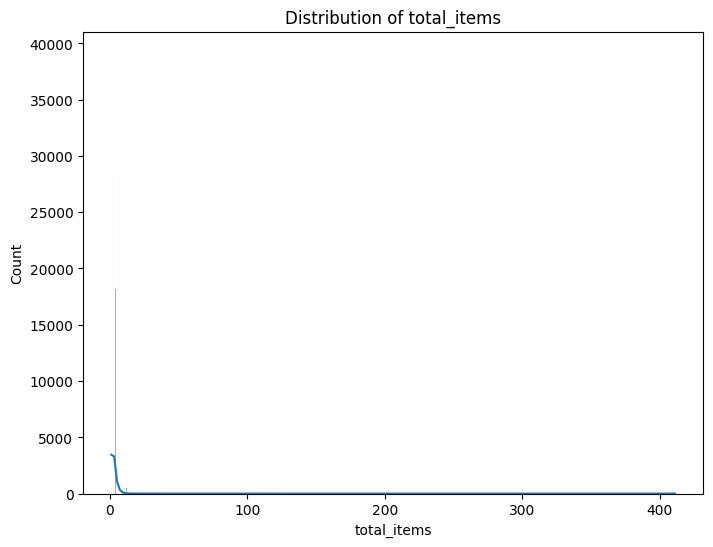

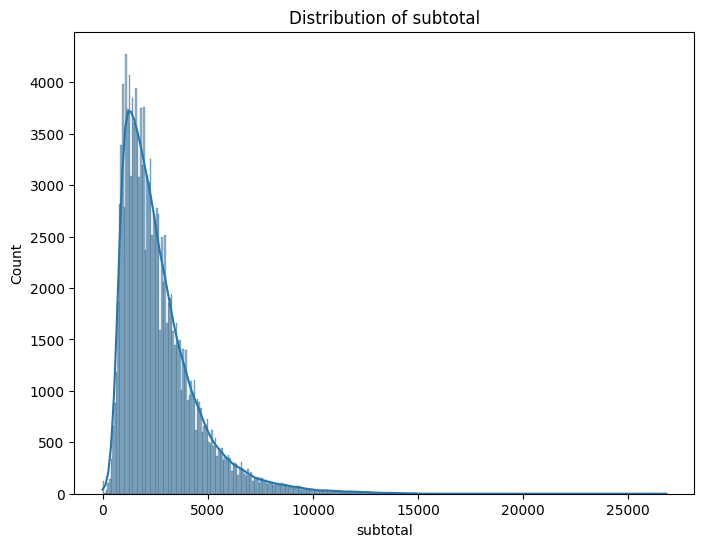

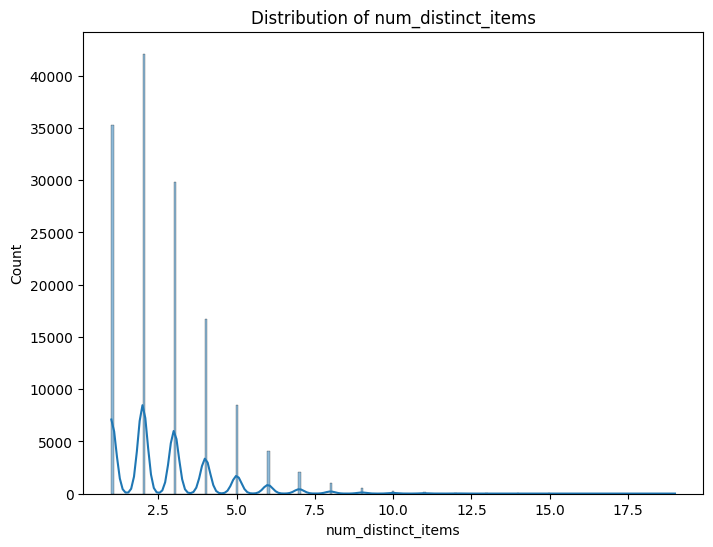

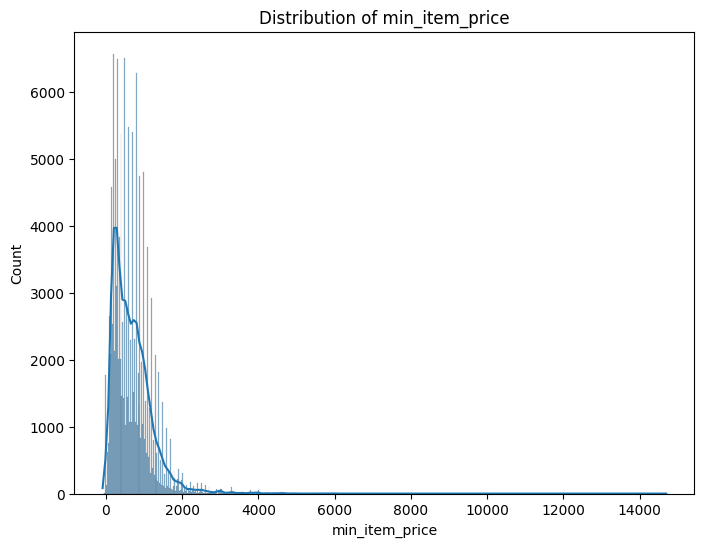

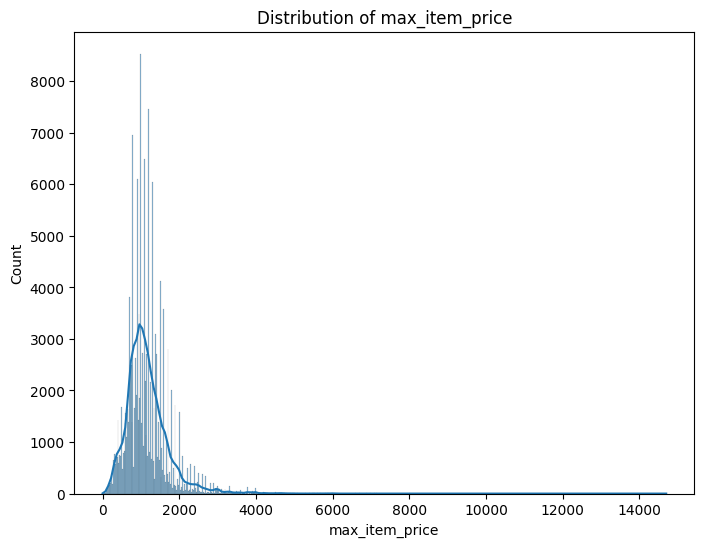

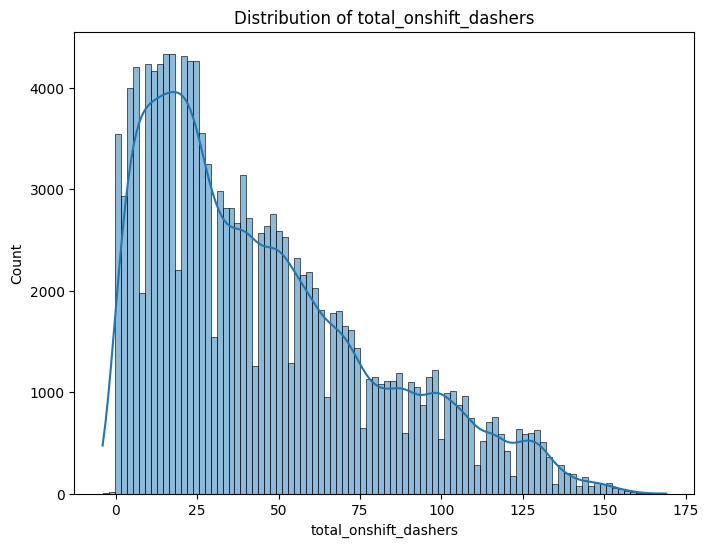

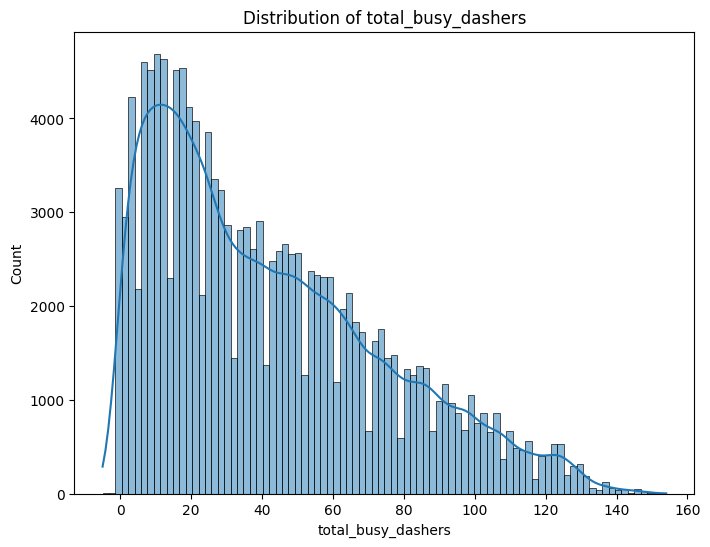

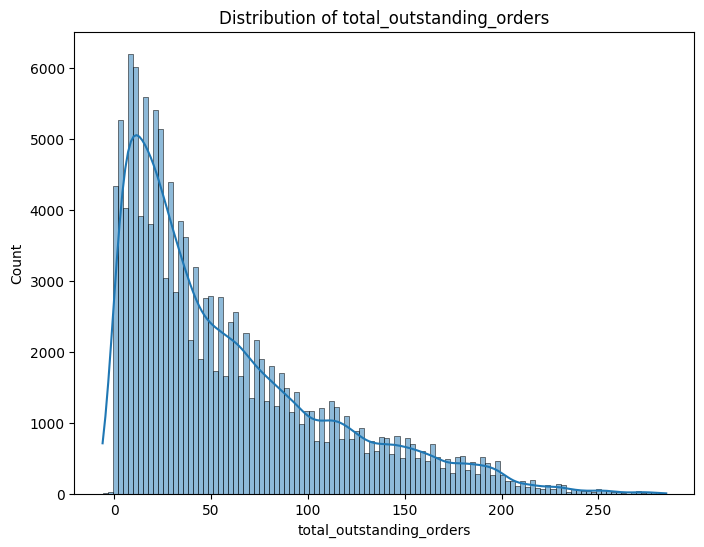

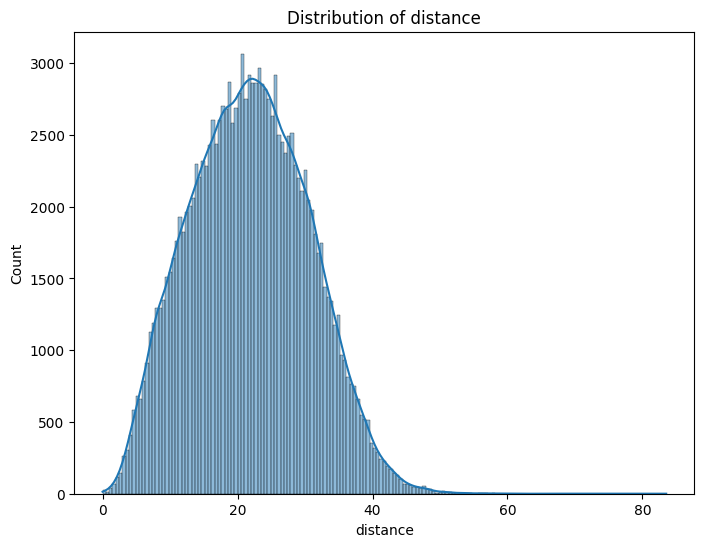

In [ ]:
# Plot distributions for all numerical columns
num_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(x_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

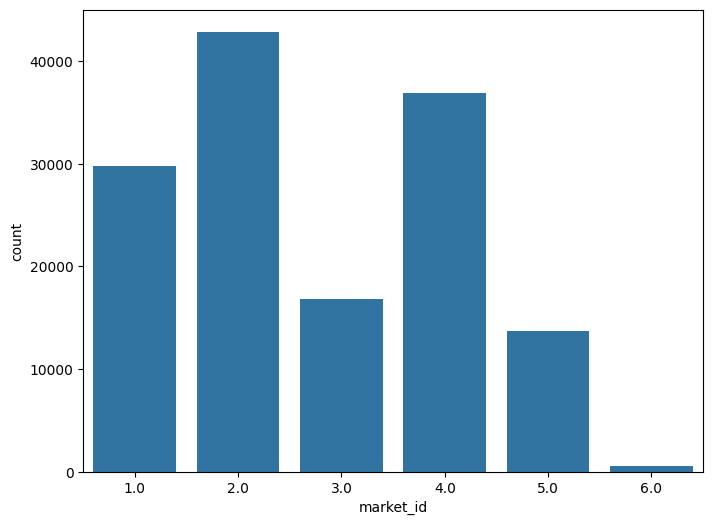

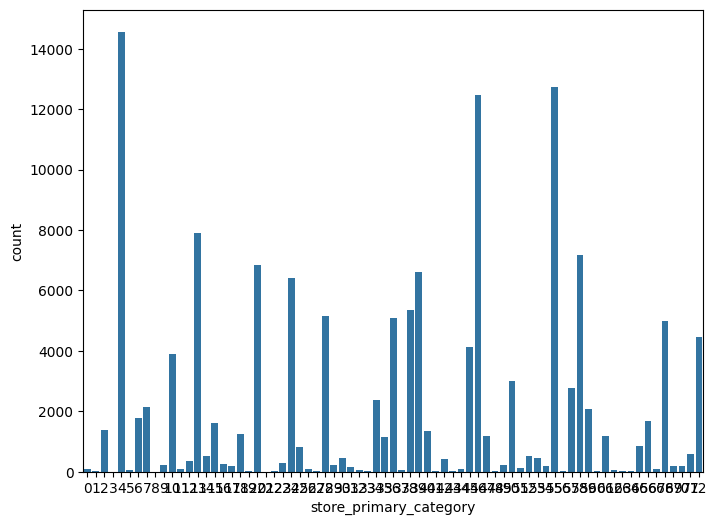

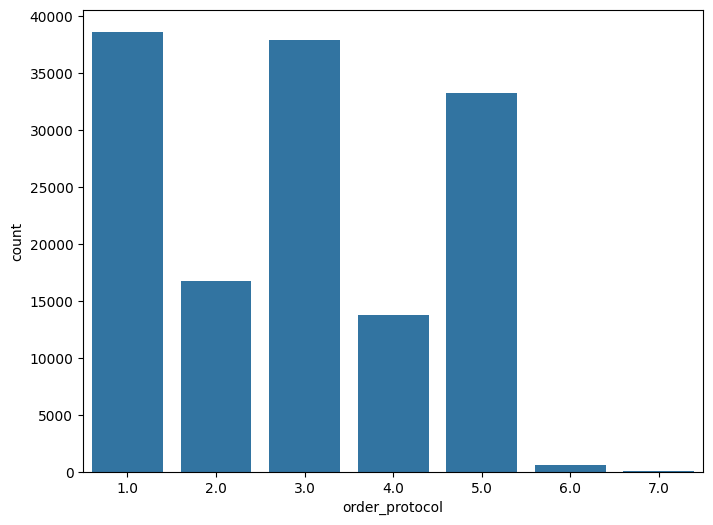

In [ ]:
# Distribution of categorical columns
cat_cols = ['market_id', 'store_primary_category', 'order_protocol']
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=x_train)


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

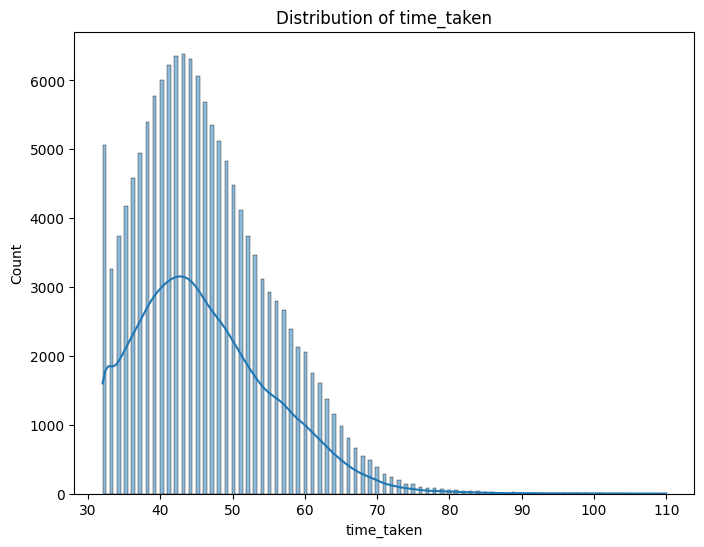

In [ ]:
# Distribution of time_taken
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of time_taken')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

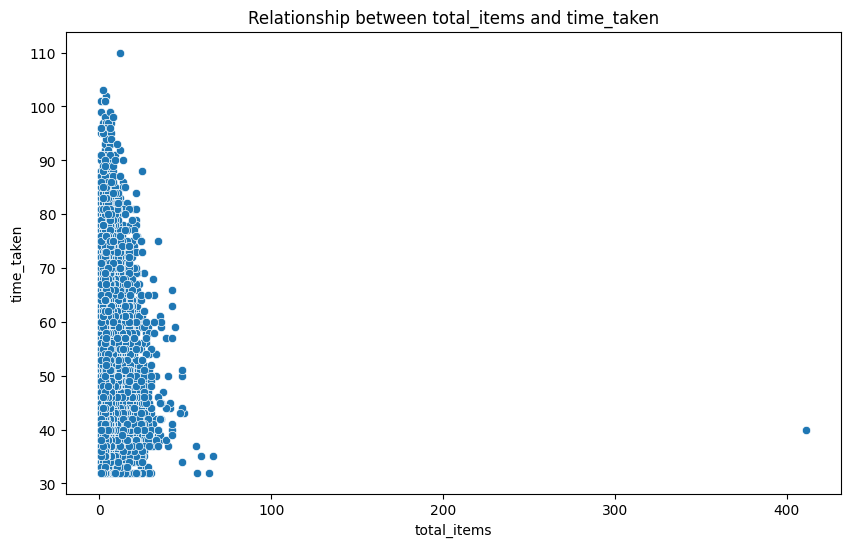

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_items', y=y_train, data=x_train)
plt.title('Relationship between total_items and time_taken')
plt.xlabel('total_items')
plt.ylabel('time_taken')
plt.show()

Text(0, 0.5, 'time_taken')

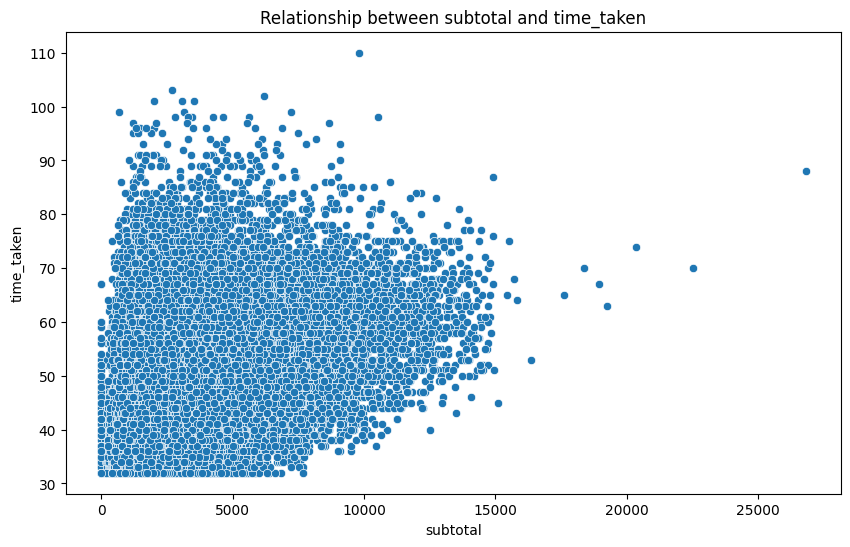

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='subtotal', y=y_train, data=x_train)
plt.title('Relationship between subtotal and time_taken')
plt.xlabel('subtotal')
plt.ylabel('time_taken')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

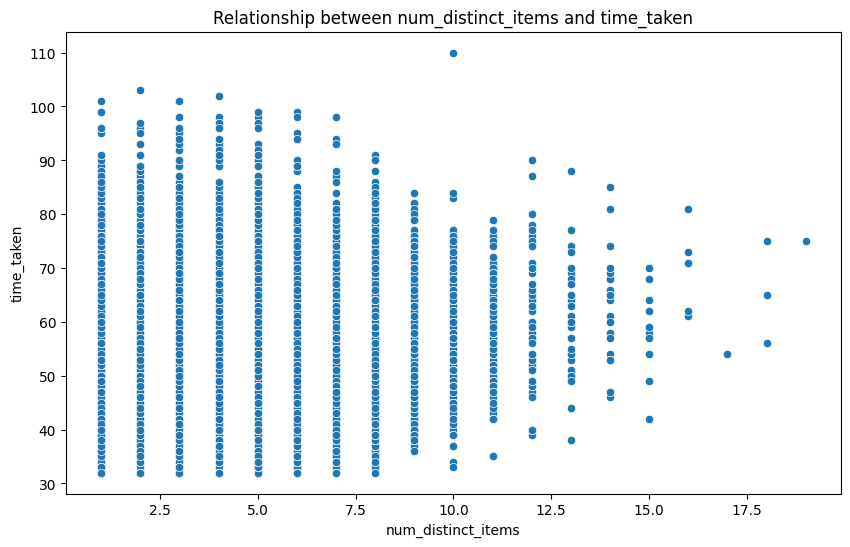

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_distinct_items', y=y_train, data=x_train)
plt.title('Relationship between num_distinct_items and time_taken')
plt

Text(0.5, 1.0, 'Relationship between min_item_price and time_taken')

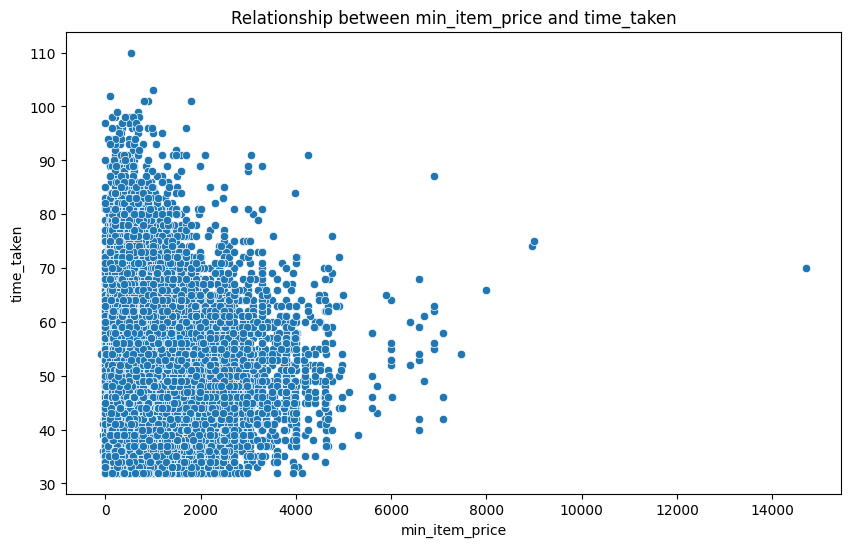

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='min_item_price', y=y_train, data=x_train)
plt.title('Relationship between min_item_price and time_taken')

Text(0.5, 1.0, 'Relationship between max_item_price and time_taken')

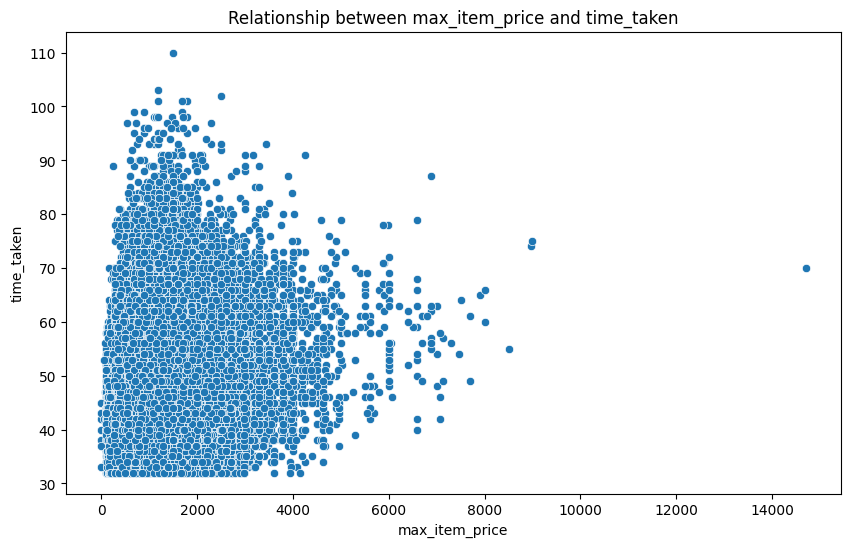

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='max_item_price', y=y_train, data=x_train)
plt.title('Relationship between max_item_price and time_taken')

Text(0.5, 1.0, 'Relationship between total_onshift_dashers and time_taken')

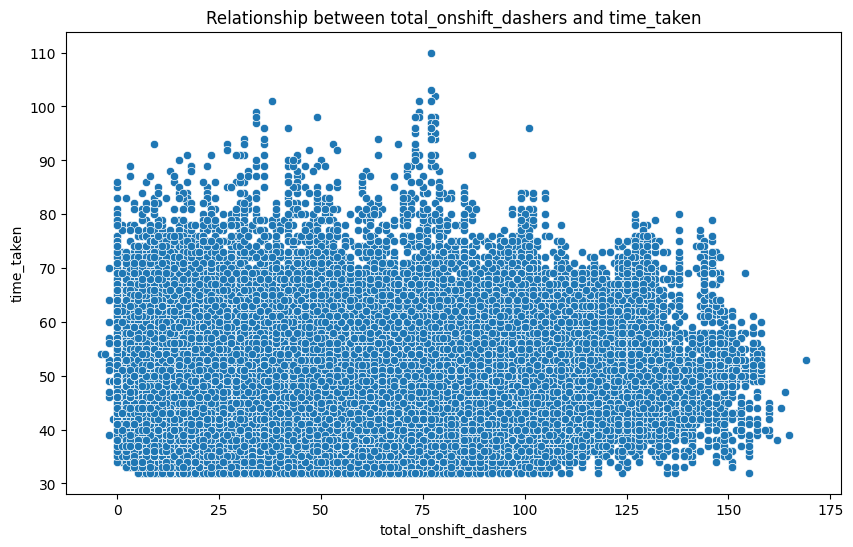

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_onshift_dashers', y=y_train, data=x_train)
plt.title('Relationship between total_onshift_dashers and time_taken')

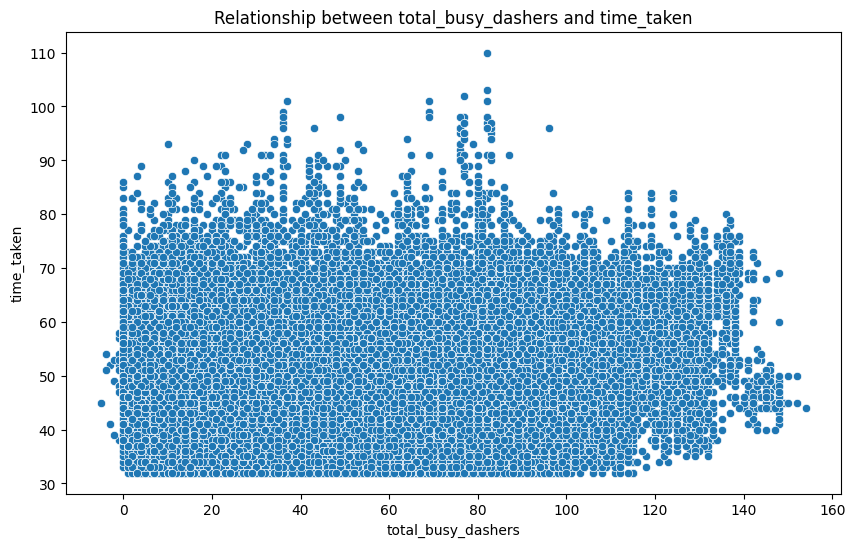

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_busy_dashers', y=y_train, data=x_train)
plt.title('Relationship between total_busy_dashers and time_taken')
plt.xlabel('total_busy_dashers')
plt.ylabel('time_taken')
plt.show()

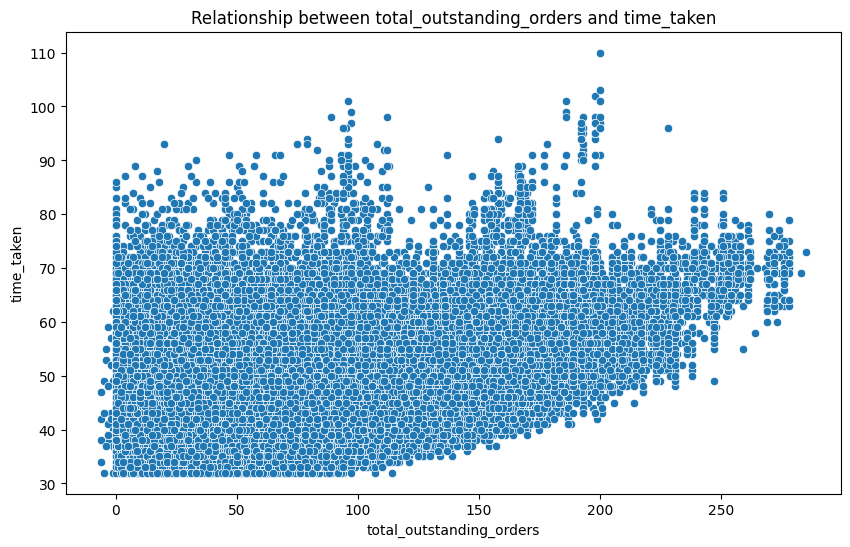

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_outstanding_orders', y=y_train, data=x_train)
plt.title('Relationship between total_outstanding_orders and time_taken')
plt.xlabel('total_outstanding_orders')
plt.ylabel('time_taken')
plt.show()

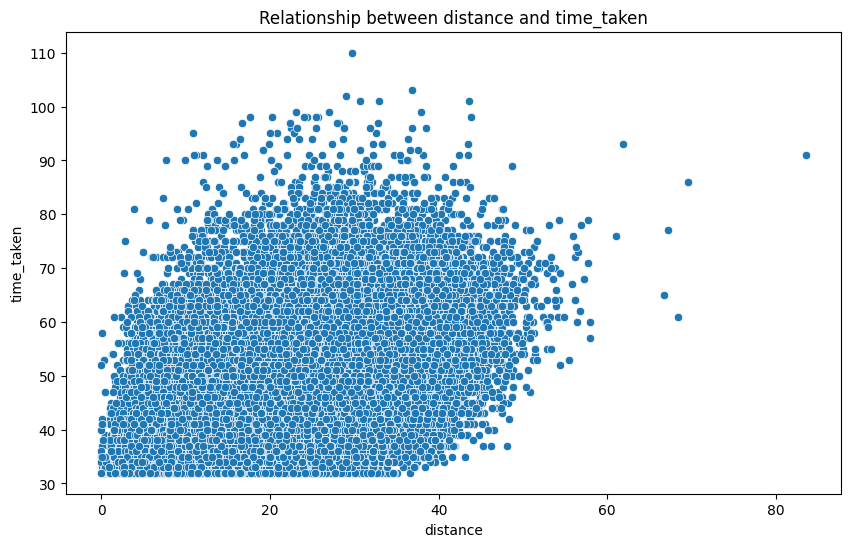

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y=y_train, data=x_train)
plt.title('Relationship between distance and time_taken')
plt.xlabel('distance')
plt.ylabel('time_taken')
plt.show()

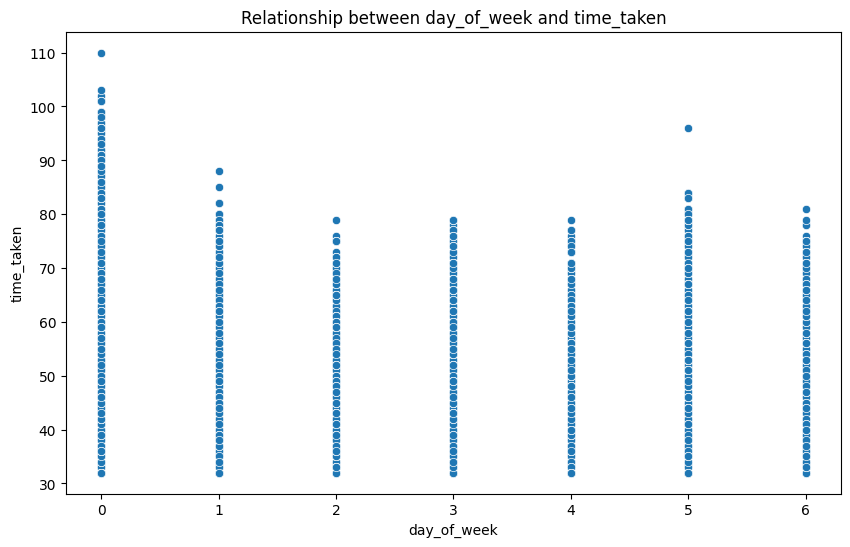

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='day_of_week', y=y_train, data=x_train)
plt.title('Relationship between day_of_week and time_taken')
plt.xlabel('day_of_week')
plt.ylabel('time_taken')
plt.show()

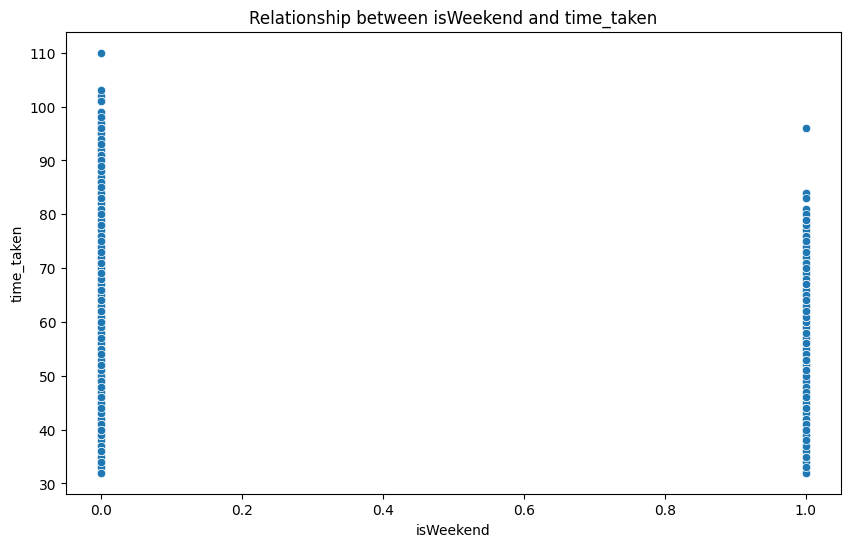

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='isWeekend', y=y_train, data=x_train)
plt.title('Relationship between isWeekend and time_taken')
plt.xlabel('isWeekend')
plt.ylabel('time_taken')
plt.show()

In [ ]:
x_train.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour', 'day_of_week',
       'isWeekend'],
      dtype='object')

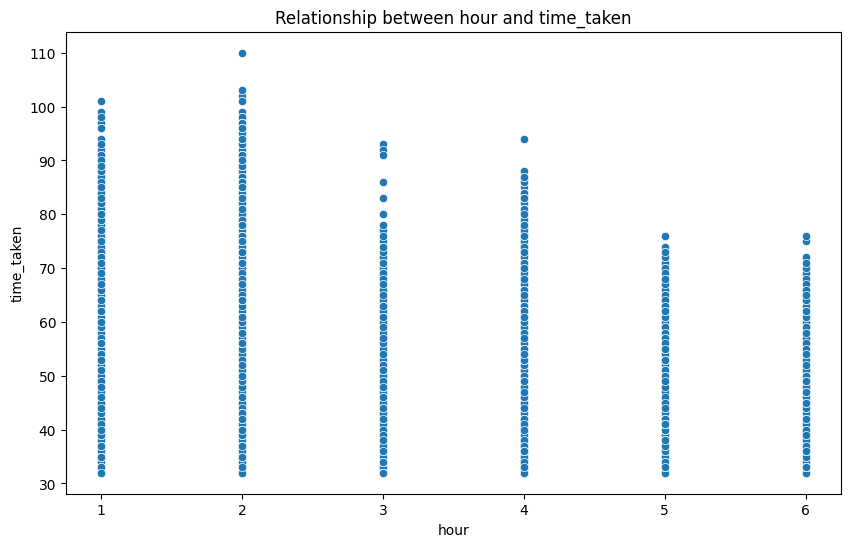

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='market_id', y=y_train, data=x_train)
plt.title('Relationship between hour and time_taken')
plt.xlabel('hour')
plt.ylabel('time_taken')
plt.show()

Text(0, 0.5, 'time_taken')

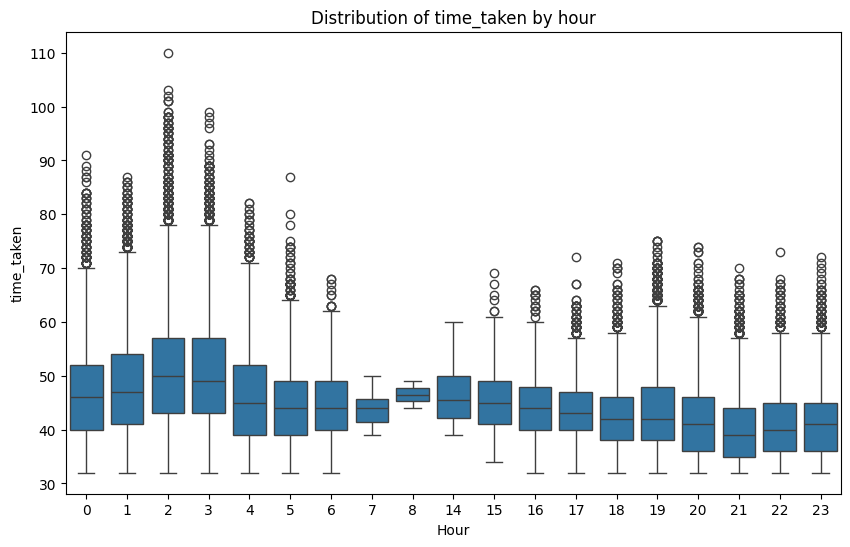

In [ ]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y=y_train, data=x_train)
plt.title('Distribution of time_taken by hour')
plt.xlabel('Hour')
plt.ylabel('time_taken')

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

In [ ]:
train_data = pd.concat([x_train, y_train], axis=1)

In [ ]:
train_data.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
97659        1.0                     24            1.0            3      2085   
10987        4.0                     28            4.0            7      1473   
63247        2.0                     36            3.0            5      5230   
27805        4.0                     20            5.0            2      1470   
113324       5.0                      4            1.0            3      2540   

        num_distinct_items  min_item_price  max_item_price  \
97659                    2             695             695   
10987                    5             159             299   
63247                    5             395            1595   
27805                    2             175            1295   
113324                   3             195            1295   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
97659                    10.0                10.0                      11.0   
10987                   116.0               103.0                     121.0   
63247                    68.0                49.0                      74.0   
27805                    94.0                94.0                     124.0   
113324                    8.0                 8.0                       5.0   

        distance  hour  day_of_week  isWeekend  time_taken  
97659      22.88     3            5          1        51.0  
10987      40.60     3            5          1        45.0  
63247      29.68     3            4          0        50.0  
27805       9.24     1            2          0        37.0  
113324     26.56     5            0          0        49.0

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

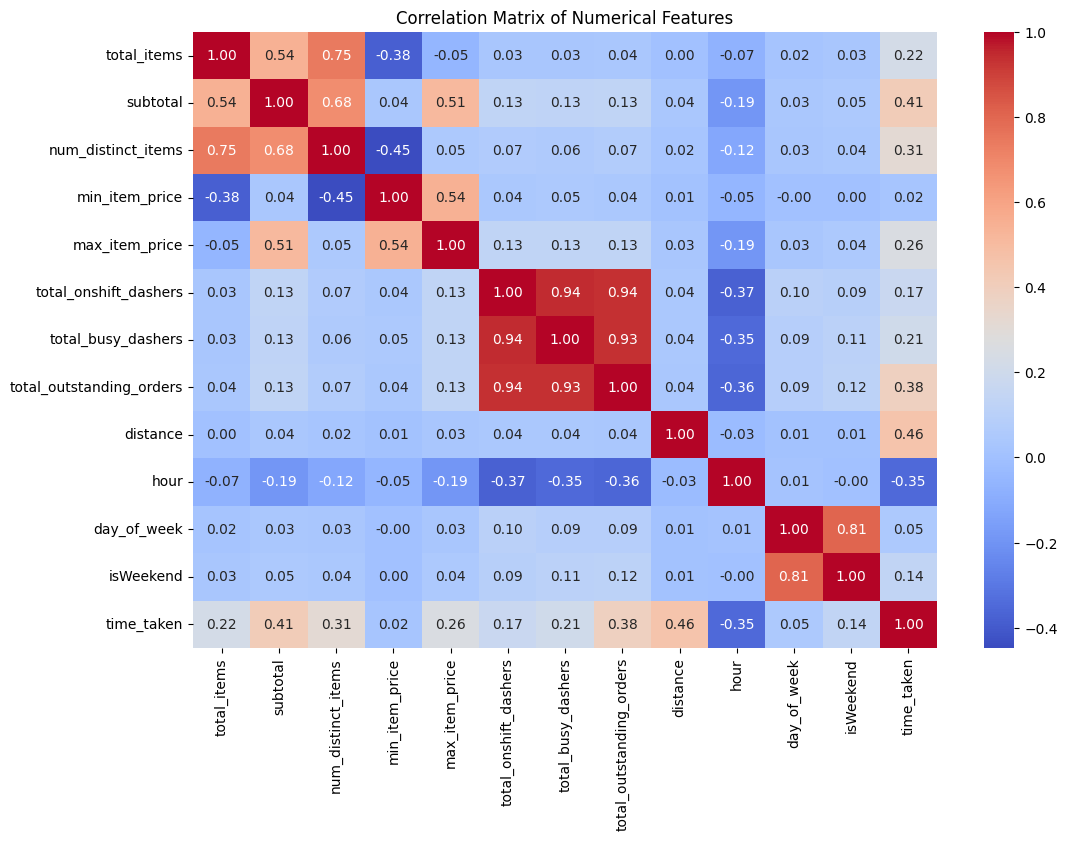

In [ ]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = train_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')


In [ ]:
correlation_matrix

total_items  subtotal  num_distinct_items  \
total_items                  1.000000  0.544538            0.745536   
subtotal                     0.544538  1.000000            0.679433   
num_distinct_items           0.745536  0.679433            1.000000   
min_item_price              -0.384072  0.038307           -0.447404   
max_item_price              -0.053072  0.510780            0.047344   
total_onshift_dashers        0.031659  0.130723            0.066278   
total_busy_dashers           0.029297  0.125616            0.061217   
total_outstanding_orders     0.035059  0.130239            0.068960   
distance                     0.004817  0.037489            0.023588   
hour                        -0.069742 -0.190467           -0.119661   
day_of_week                  0.020760  0.034924            0.029973   
isWeekend                    0.028550  0.049320            0.043748   
time_taken                   0.220759  0.412804            0.312685   

                          min_item_price  max_item_price  \
total_items                    -0.384072       -0.053072   
subtotal                        0.038307        0.510780   
num_distinct_items             -0.447404        0.047344   
min_item_price                  1.000000        0.542306   
max_item_price                  0.542306        1.000000   
total_onshift_dashers           0.043966        0.134903   
total_busy_dashers              0.045605        0.132875   
total_outstanding_orders        0.042481        0.132203   
distance                        0.005764        0.031461   
hour                           -0.052416       -0.190739   
day_of_week                    -0.000321        0.030858   
isWeekend                       0.000588        0.044847   
time_taken                      0.022661        0.256028   

                          total_onshift_dashers  total_busy_dashers  \
total_items                            0.031659            0.029297   
subtotal                               0.130723            0.125616   
num_distinct_items                     0.066278            0.061217   
min_item_price                         0.043966            0.045605   
max_item_price                         0.134903            0.132875   
total_onshift_dashers                  1.000000            0.944018   
total_busy_dashers                     0.944018            1.000000   
total_outstanding_orders               0.936284            0.933008   
distance                               0.044140            0.042462   
hour                                  -0.374715           -0.350370   
day_of_week                            0.103358            0.086471   
isWeekend                              0.090829            0.109464   
time_taken                             0.170436            0.205660   

                          total_outstanding_orders  distance      hour  \
total_items                               0.035059  0.004817 -0.069742   
subtotal                                  0.130239  0.037489 -0.190467   
num_distinct_items                        0.068960  0.023588 -0.119661   
min_item_price                            0.042481  0.005764 -0.052416   
max_item_price                            0.132203  0.031461 -0.190739   
total_onshift_dashers                     0.936284  0.044140 -0.374715   
total_busy_dashers                        0.933008  0.042462 -0.350370   
total_outstanding_orders                  1.000000  0.037380 -0.362311   
distance                                  0.037380  1.000000 -0.025188   
hour                                     -0.362311 -0.025188  1.000000   
day_of_week                               0.087730  0.008868  0.013676   
isWeekend                                 0.116231  0.007945 -0.000056   
time_taken                                0.384322  0.458906 -0.345998   

                          day_of_week  isWeekend  time_taken  
total_items                  0.020760   0.028550    0.220759  
subtotal                     0.0

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [ ]:
x_train.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour', 'day_of_week',
       'isWeekend'],
      dtype='object')

In [ ]:
# Drop 3-5 weakly correlated columns from training dataset
x_train_reduced = x_train.drop(['day_of_week','isWeekend','min_item_price','total_onshift_dashers'], axis=1)


In [ ]:
x_train_reduced.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'max_item_price',
       'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour'],
      dtype='object')

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

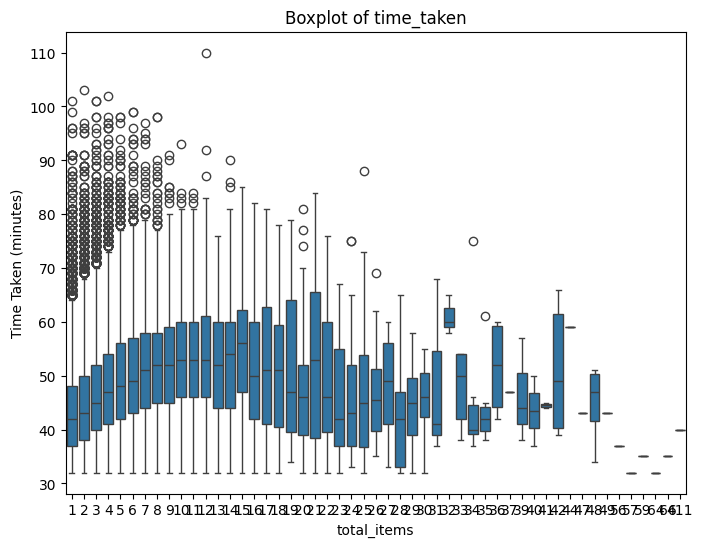

In [ ]:
# Boxplot for time_taken
plt.figure(figsize=(8, 6))
sns.boxplot(x='total_items' , y=y_train , data = x_train)
plt.title('Boxplot of time_taken')
plt.ylabel('Time Taken (minutes)')
plt.show()


In [ ]:
x_train_reduced.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'max_item_price',
       'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour'],
      dtype='object')

In [ ]:
x_train_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 97659 to 15725
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  category
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   total_items               140621 non-null  int64   
 4   subtotal                  140621 non-null  int64   
 5   num_distinct_items        140621 non-null  int64   
 6   max_item_price            140621 non-null  int64   
 7   total_busy_dashers        140621 non-null  float64 
 8   total_outstanding_orders  140621 non-null  float64 
 9   distance                  140621 non-null  float64 
 10  hour                      140621 non-null  int32   
dtypes: category(3), float64(3), int32(1), int64(4)
memory usage: 9.5 MB


In [ ]:
num_cols = ['max_item_price','total_items','subtotal','num_distinct_items','total_busy_dashers','total_outstanding_orders','distance','hour']

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

outlier_reports = {}

for col in num_cols:
    outliers = detect_outliers_iqr(x_train_reduced, col)
    if not outliers.empty:
        outlier_reports[col] = len(outliers)

In [ ]:
outlier_reports

{}

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [ ]:
# Handle outliers
for col in num_cols:
    q1=x_train_reduced[col].describe()["25%"] # Q1 - 25th Percentile
    q3=x_train_reduced[col].describe()["75%"] # Q3 - 75th Percentile
    iqr=q3-q1                     # IQR - InterQuartile Range
    lower_whisker=q1-1.5*iqr      # Lower Bound
    upper_whisker=q3+1.5*iqr      # Upper Bound
    #np.where(condition,what to do if condition is true, what to do if condition is false)
    #print(df1[df1[col]<lower_whisker])
    #print(df1[df1[col]>upper_whisker])
    x_train_reduced[col]=np.where(x_train_reduced[col]<lower_whisker,lower_whisker,x_train_reduced[col]) # Flooring
    x_train_reduced[col]=np.where(x_train_reduced[col]>upper_whisker,upper_whisker,x_train_reduced[col]) # Capping/Ceiling

In [ ]:
outlier_reports

{}

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation
num_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
cat_cols = ['market_id', 'store_primary_category', 'order_protocol']

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

<Figure size 1200x800 with 0 Axes>

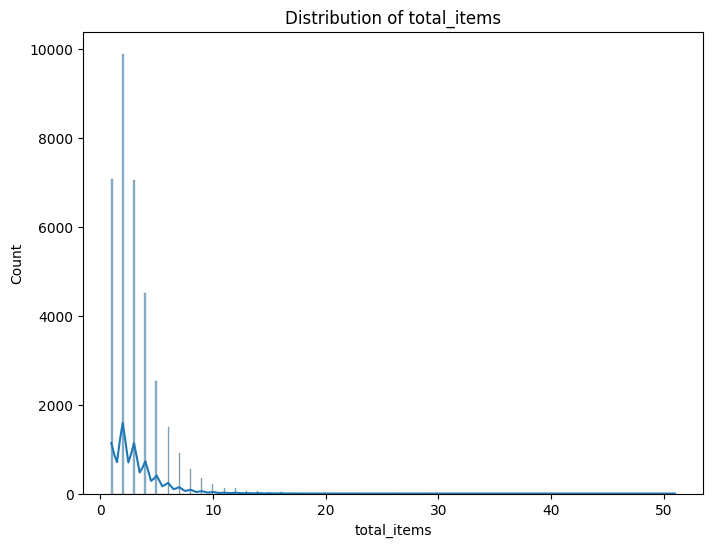

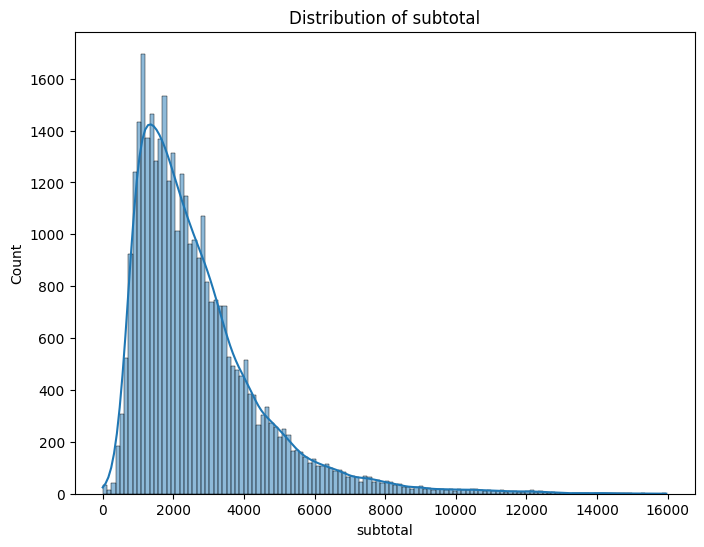

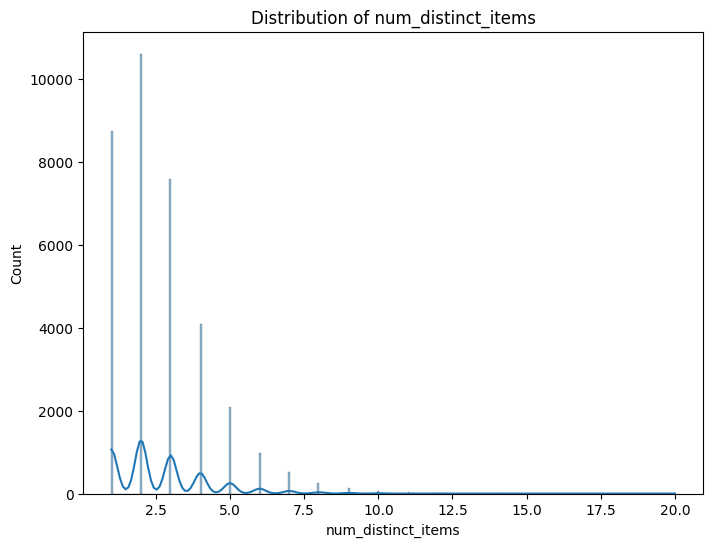

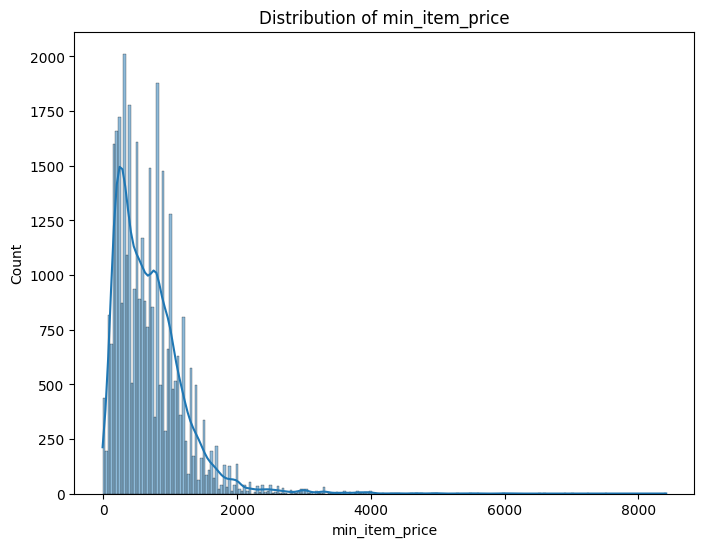

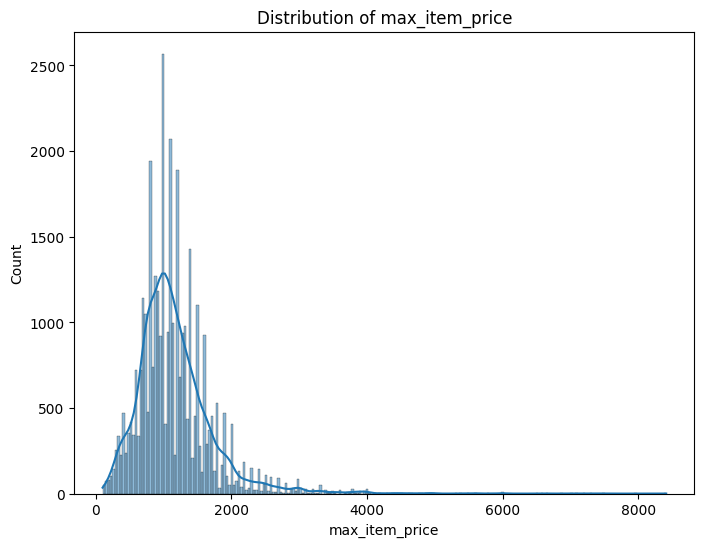

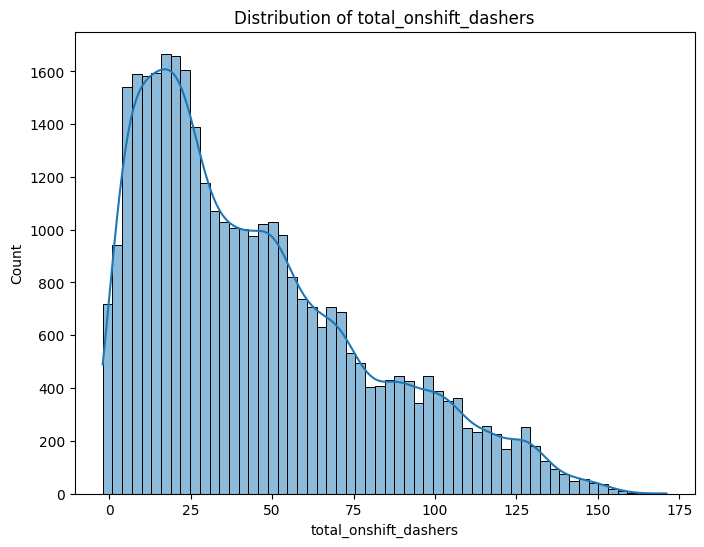

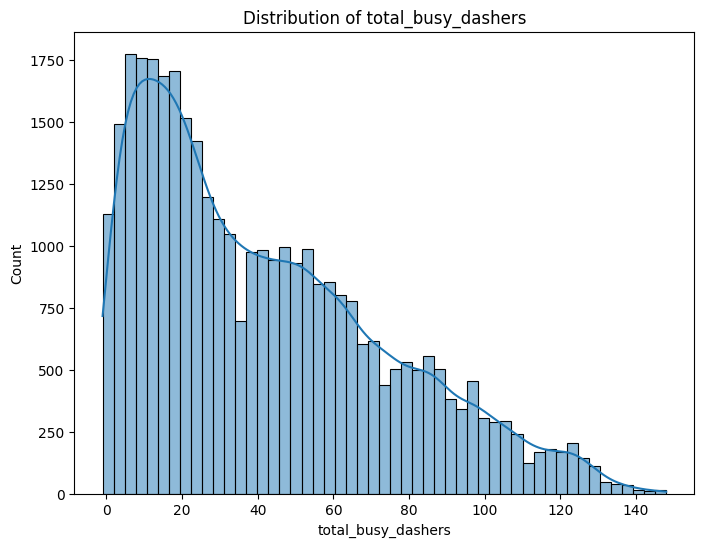

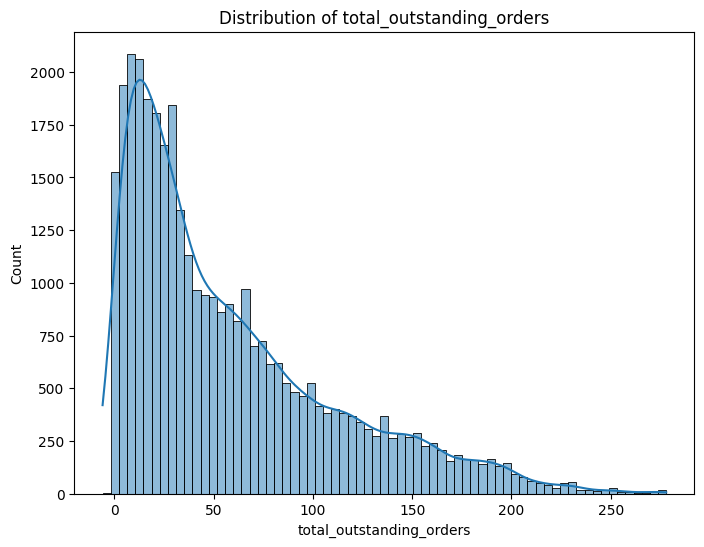

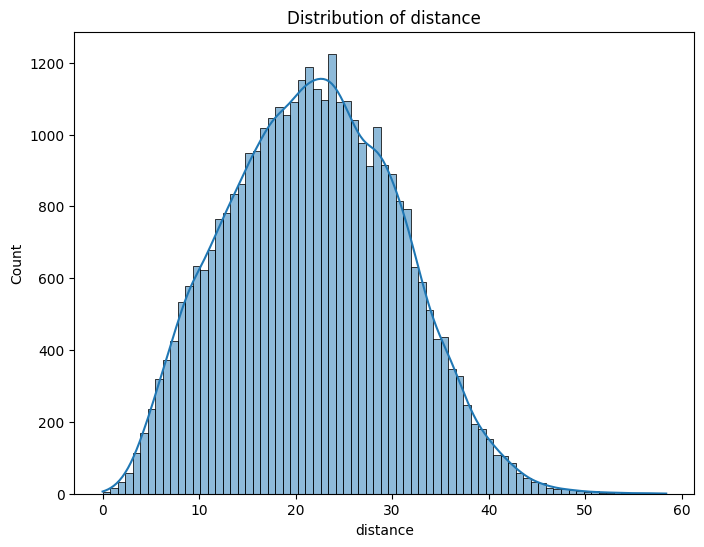

In [ ]:
# Plot distributions for all numerical columns
plt.figure(figsize=(12, 8))
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(x_test[col], kde=True)
    plt.title(f'Distribution of {col}')


##### **4.1.2**
Check the distribution of categorical features

<Figure size 1200x800 with 0 Axes>

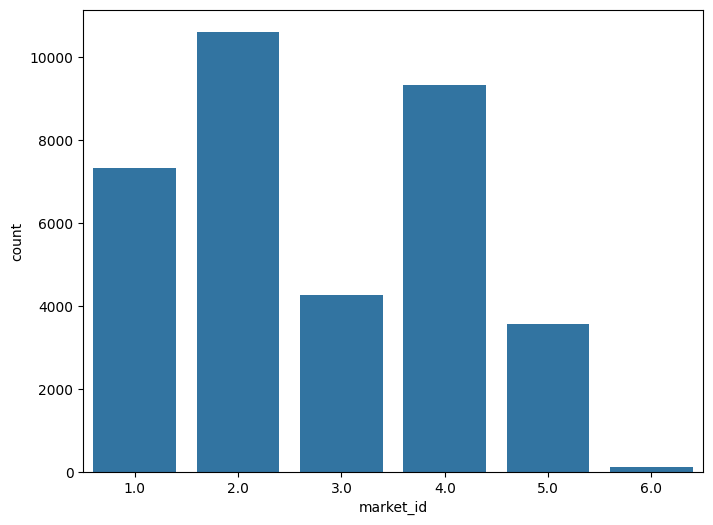

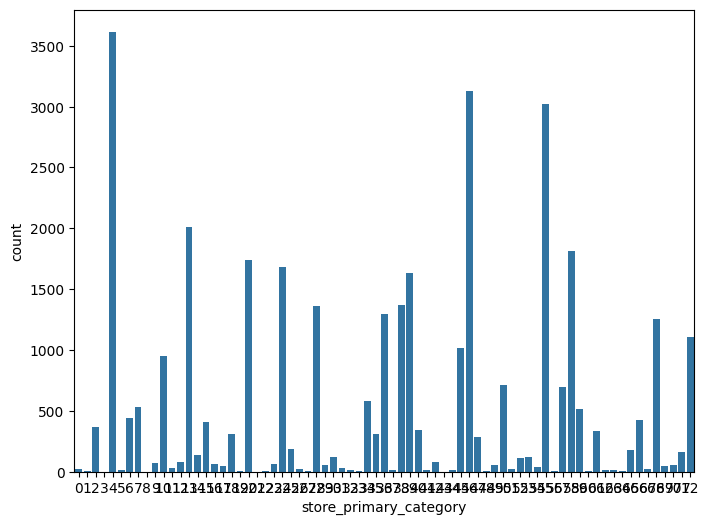

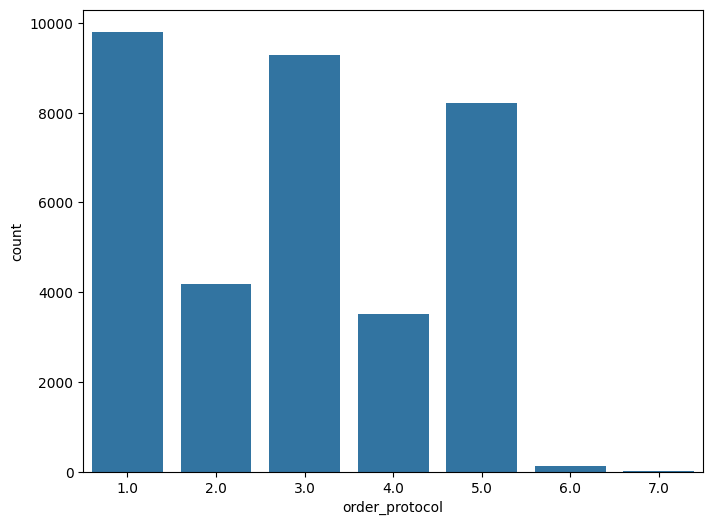

In [ ]:
# Distribution of categorical columns
plt.figure(figsize=(12, 8))
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=x_test)


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

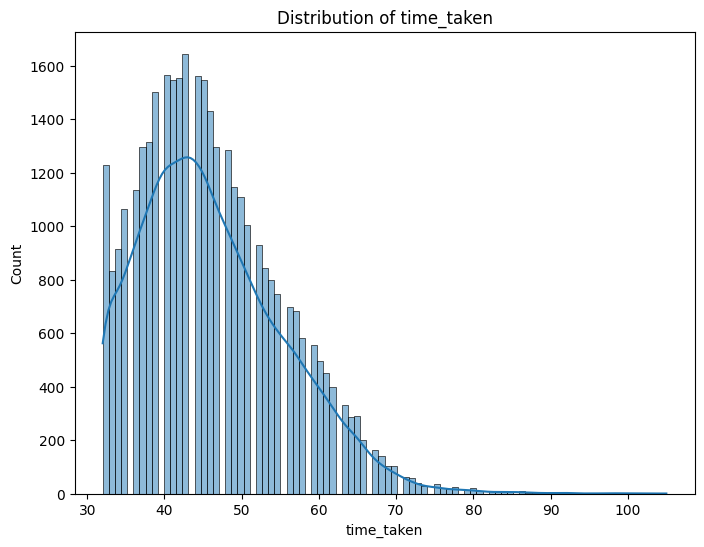

In [ ]:
# Distribution of time_taken
plt.figure(figsize=(8, 6))
sns.histplot(y_test, kde=True)
plt.title('Distribution of time_taken')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

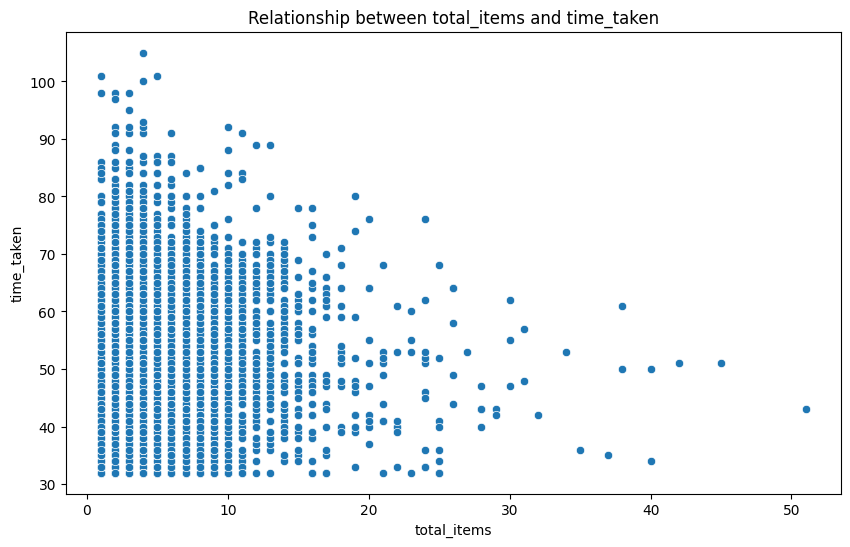

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_items', y=y_test, data=x_test)
plt.title('Relationship between total_items and time_taken')
plt.xlabel('total_items')
plt.ylabel('time_taken')
plt.show()


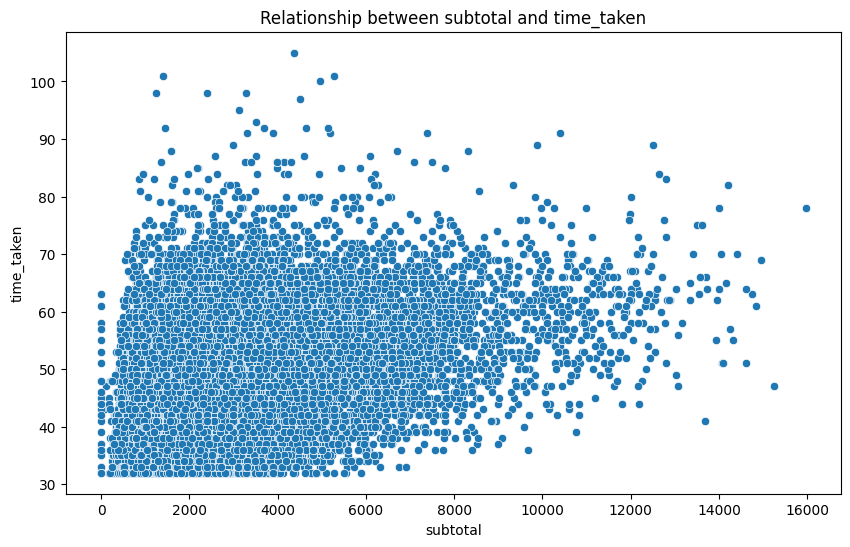

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='subtotal', y=y_test, data=x_test)
plt.title('Relationship between subtotal and time_taken')
plt.xlabel('subtotal')
plt.ylabel('time_taken')
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 97659 to 15725
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  category
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   total_items               140621 non-null  int64   
 4   subtotal                  140621 non-null  int64   
 5   num_distinct_items        140621 non-null  int64   
 6   min_item_price            140621 non-null  int64   
 7   max_item_price            140621 non-null  int64   
 8   total_onshift_dashers     140621 non-null  float64 
 9   total_busy_dashers        140621 non-null  float64 
 10  total_outstanding_orders  140621 non-null  float64 
 11  distance                  140621 non-null  float64 
 12  hour                      140621 non-null  int32   
 13  day_of_week               14062

In [ ]:
x_train_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 97659 to 15725
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   market_id               140621 non-null  category
 1   store_primary_category  140621 non-null  category
 2   order_protocol          140621 non-null  category
 3   min_item_price          140621 non-null  float64 
 4   max_item_price          140621 non-null  float64 
 5   distance                140621 non-null  float64 
 6   hour                    140621 non-null  float64 
 7   day_of_week             140621 non-null  int32   
 8   isWeekend               140621 non-null  int64   
dtypes: category(3), float64(4), int32(1), int64(1)
memory usage: 7.4 MB


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
# Apply scaling to the numerical columns
scaler = MinMaxScaler()
# numerical columns
num_vars = ['max_item_price','total_items','subtotal','num_distinct_items','total_busy_dashers','total_outstanding_orders','distance','hour']

# fit on data
x_train_reduced[num_vars] = scaler.fit_transform(x_train_reduced[num_vars])


In [ ]:
x_train_reduced.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
97659        1.0                     24            1.0     0.333333  0.324009   
10987        4.0                     28            4.0     1.000000  0.228904   
63247        2.0                     36            3.0     0.666667  0.812743   
27805        4.0                     20            5.0     0.166667  0.228438   
113324       5.0                      4            1.0     0.333333  0.394716   

        num_distinct_items  max_item_price  total_busy_dashers  \
97659                  0.2        0.303626            0.109091   
10987                  0.8        0.130625            0.785455   
63247                  0.8        0.696811            0.392727   
27805                  0.2        0.565749            0.720000   
113324                 0.4        0.565749            0.094545   

        total_outstanding_orders  distance      hour  
97659                   0.088083  0.484540  0.130435  
10987                   0.658031  0.859805  0.130435  
63247                   0.414508  0.628547  0.130435  
27805                   0.673575  0.195680  0.043478  
113324                  0.056995  0.562474  0.217391

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model
x_train_sm = sm.add_constant(x_train_reduced)
lr = sm.OLS(y_train, x_train_sm).fit()

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                 2.948e+04
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:23:32   Log-Likelihood:            -4.2953e+05
No. Observations:              140621   AIC:                         8.591e+05
Df Residuals:                  140609   BIC:                         8.592e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       36.5018      0.076    480.547      0.000      36.353      36.651
market_id                   -0.7734      0.010    -74.885      0.000      -0.794      -0.753
store_primary_category       0.0032      0.001      4.748      0.000       0.002       0.004
order_protocol              -0.7834      0.009    -84.464      0.000      -0.802      -0.765
total_items                 -0.0575      0.125     -0.460      0.645      -0.302       0.187
subtotal                     9.5959      0.123     78.034      0.000       9.355       9.837
num_distinct_items           2.6580      0.113     23.542      0.000       2.437       2.879
max_item_price               1.2221      0.108     11.296      0.000       1.010       1.434
total_busy_dashers         -47.8823      0.168   -285.513      0.000     -48.211     -47.554
total_outstanding_orders    49.4356      0.150    330.670      0.000      49.143      49.729
distance                    22.1861      0.074    299.162      0.000      22.041      22.331
hour                        -4.2763      0.040   -107.245      0.000      -4.354      -4.198
==============================================================================
Omnibus:                    11468.128   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31065.362
Skew:                           0.464   Prob(JB):                         0.00
Kurtosis:                       5.107   Cond. No.                         671.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# checking vif
vif = pd.DataFrame()
vif['Features'] = x_train_reduced.columns
vif['VIF'] = [variance_inflation_factor(x_train_reduced.values, i) for i in range(x_train_reduced.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7         total_busy_dashers  25.26
8   total_outstanding_orders  21.17
4                   subtotal  17.16
3                total_items  15.72
6             max_item_price  13.83
5         num_distinct_items  12.64
9                   distance   5.93
0                  market_id   4.64
2             order_protocol   4.38
1     store_primary_category   3.79
10                      hour   2.07

In [ ]:
# now drop the column with high VIF
x = x_train_reduced.drop('total_items', axis=1)

# again build the model
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                 3.243e+04
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:25:11   Log-Likelihood:            -4.2953e+05
No. Observations:              140621   AIC:                         8.591e+05
Df Residuals:                  140610   BIC:                         8.592e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       36.4939      0.074    493.066      0.000      36.349      36.639
market_id                   -0.7734      0.010    -74.884      0.000      -0.794      -0.753
store_primary_category       0.0032      0.001      4.765      0.000       0.002       0.004
order_protocol              -0.7834      0.009    -84.487      0.000      -0.802      -0.765
subtotal                     9.5686      0.108     88.772      0.000       9.357       9.780
num_distinct_items           2.6191      0.075     35.052      0.000       2.473       2.766
max_item_price               1.2457      0.095     13.081      0.000       1.059       1.432
total_busy_dashers         -47.8826      0.168   -285.517      0.000     -48.211     -47.554
total_outstanding_orders    49.4360      0.149    330.682      0.000      49.143      49.729
distance                    22.1866      0.074    299.193      0.000      22.041      22.332
hour                        -4.2763      0.040   -107.245      0.000      -4.354      -4.198
==============================================================================
Omnibus:                    11468.639   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31065.835
Skew:                           0.464   Prob(JB):                         0.00
Kurtosis:                       5.107   Cond. No.                         671.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# now again check the vif
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features    VIF
6        total_busy_dashers  25.23
7  total_outstanding_orders  21.16
3                  subtotal  13.58
5            max_item_price  11.28
8                  distance   5.88
4        num_distinct_items   5.28
0                 market_id   4.61
2            order_protocol   4.33
1    store_primary_category   3.78
9                      hour   2.05

In [ ]:
# now drop the column with high VIF
x = x.drop('total_busy_dashers', axis=1)

# again build the model
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                 1.707e+04
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:26:49   Log-Likelihood:            -4.6168e+05
No. Observations:              140621   AIC:                         9.234e+05
Df Residuals:                  140611   BIC:                         9.235e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       33.9995      0.092    368.052      0.000      33.818      34.181
market_id                   -0.7572      0.013    -58.334      0.000      -0.783      -0.732
store_primary_category       0.0018      0.001      2.149      0.032       0.000       0.003
order_protocol              -0.9569      0.012    -82.279      0.000      -0.980      -0.934
subtotal                     9.6579      0.135     71.288      0.000       9.392       9.923
num_distinct_items           2.7702      0.094     29.499      0.000       2.586       2.954
max_item_price               0.6521      0.120      5.449      0.000       0.418       0.887
total_outstanding_orders    10.0068      0.072    139.049      0.000       9.866      10.148
distance                    21.7684      0.093    233.604      0.000      21.586      21.951
hour                        -4.0302      0.050    -80.435      0.000      -4.128      -3.932
==============================================================================
Omnibus:                    10046.242   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18906.893
Skew:                           0.514   Prob(JB):                         0.00
Kurtosis:                       4.473   Cond. No.                         443.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# now again check the vif
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features    VIF
3                  subtotal  13.57
5            max_item_price  11.21
7                  distance   5.84
4        num_distinct_items   5.28
0                 market_id   4.60
2            order_protocol   4.27
1    store_primary_category   3.78
6  total_outstanding_orders   3.04
8                      hour   2.05

In [ ]:
# now drop the column with high VIF
x = x.drop('subtotal', axis=1)

# again build the model
x_train_sm = sm.add_constant(x)
lr = sm.OLS(y_train, x_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                 1.792e+04
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        13:29:06   Log-Likelihood:            -4.6418e+05
No. Observations:              140621   AIC:                         9.284e+05
Df Residuals:                  140612   BIC:                         9.285e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       33.2708      0.093    356.014      0.000      33.088      33.454
market_id                   -0.7754      0.013    -58.694      0.000      -0.801      -0.750
store_primary_category       0.0053      0.001      6.261      0.000       0.004       0.007
order_protocol              -0.9533      0.012    -80.525      0.000      -0.976      -0.930
num_distinct_items           7.8713      0.062    127.147      0.000       7.750       7.993
max_item_price               6.4516      0.089     72.219      0.000       6.277       6.627
total_outstanding_orders    10.1090      0.073    138.025      0.000       9.965      10.253
distance                    21.8625      0.095    230.509      0.000      21.677      22.048
hour                        -4.1425      0.051    -81.262      0.000      -4.242      -4.043
==============================================================================
Omnibus:                     9673.952   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17397.686
Skew:                           0.512   Prob(JB):                         0.00
Kurtosis:                       4.385   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# now again check the vif
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6                  distance  5.83
4            max_item_price  5.61
0                 market_id  4.58
2            order_protocol  4.27
1    store_primary_category  3.77
5  total_outstanding_orders  3.04
3        num_distinct_items  2.22
7                      hour  2.04

In [ ]:
# Train the model using the training data
lr = LinearRegression()
lr_model = lr.fit(x_train_reduced, y_train)

In [ ]:
lr_model.coef_

array([-7.73428028e-01,  3.16386501e-03, -7.83367467e-01, -5.75036496e-02,
        9.59587291e+00,  2.65803144e+00,  1.22209699e+00, -4.78822924e+01,
        4.94355725e+01,  2.21861115e+01, -4.27633853e+00])

In [ ]:
# Make predictions
lr_predictions = lr_model.predict(x_train_reduced)


In [ ]:
# Find results for evaluation metrics
mse = mean_squared_error(y_train, lr_predictions)
mae = mean_absolute_error(y_train, lr_predictions)
r2 = r2_score(y_train, lr_predictions)

In [ ]:
print(mse)
print(mae)
print(r2)

26.341313333347344
3.8109471482300457
0.6975318383112725


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [ ]:
# Loop through the number of features and test the model
for i in range(1, x_train_reduced.shape[1]):
    rfe = RFE(estimator=lr_model, step=1, n_features_to_select=10)


In [ ]:
rfe = RFE(estimator=lr_model, step=1, n_features_to_select=10)
rfe = rfe.fit(x_train_reduced, y_train)

In [ ]:
list(zip(x_train_reduced.columns, rfe.support_, rfe.ranking_))

[('market_id', np.True_, np.int64(1)),
 ('store_primary_category', np.False_, np.int64(2)),
 ('order_protocol', np.True_, np.int64(1)),
 ('total_items', np.True_, np.int64(1)),
 ('subtotal', np.True_, np.int64(1)),
 ('num_distinct_items', np.True_, np.int64(1)),
 ('max_item_price', np.True_, np.int64(1)),
 ('total_busy_dashers', np.True_, np.int64(1)),
 ('total_outstanding_orders', np.True_, np.int64(1)),
 ('distance', np.True_, np.int64(1)),
 ('hour', np.True_, np.int64(1))]

In [ ]:
col = x_train_reduced.columns[rfe.support_]
col

Index(['market_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'max_item_price', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour'],
      dtype='object')

In [ ]:
# Build the final model with selected number of features
X_train_rfe = x_train_reduced[col]

# add constant
x_train_sm = sm.add_constant(X_train_rfe)

# fit the model
lr_rfe = sm.OLS(y_train, x_train_sm).fit()

# check the summary
lr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                 3.242e+04
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:35:09   Log-Likelihood:            -4.2954e+05
No. Observations:              140621   AIC:                         8.591e+05
Df Residuals:                  140610   BIC:                         8.592e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       36.5982      0.073    499.985      0.000      36.455      36.742
market_id                   -0.7720      0.010    -74.774      0.000      -0.792      -0.752
order_protocol              -0.7799      0.009    -84.347      0.000      -0.798      -0.762
total_items                 -0.0767      0.125     -0.614      0.539      -0.321       0.168
subtotal                     9.6352      0.123     78.526      0.000       9.395       9.876
num_distinct_items           2.6534      0.113     23.500      0.000       2.432       2.875
max_item_price               1.2023      0.108     11.120      0.000       0.990       1.414
total_busy_dashers         -47.8764      0.168   -285.464      0.000     -48.205     -47.548
total_outstanding_orders    49.4466      0.149    330.759      0.000      49.154      49.740
distance                    22.1855      0.074    299.131      0.000      22.040      22.331
hour                        -4.2772      0.040   -107.259      0.000      -4.355      -4.199
==============================================================================
Omnibus:                    11484.846   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31096.760
Skew:                           0.465   Prob(JB):                         0.00
Kurtosis:                       5.108   Cond. No.                         72.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# now again check the vif
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                      const  28.60
8   total_outstanding_orders   8.26
7         total_busy_dashers   8.17
3                total_items   7.14
5         num_distinct_items   5.56
4                   subtotal   4.58
6             max_item_price   2.57
10                      hour   1.21
2             order_protocol   1.04
1                  market_id   1.01
9                   distance   1.00

In [ ]:
# Build the final model with selected number of features
x_train_sm = x_train_sm.drop('total_items', axis=1)

# add constant
x_train_sm = sm.add_constant(x_train_sm)

# fit the model
lr_rfe = sm.OLS(y_train, x_train_sm).fit()

# check the summary
lr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                 3.602e+04
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:39:10   Log-Likelihood:            -4.2954e+05
No. Observations:              140621   AIC:                         8.591e+05
Df Residuals:                  140611   BIC:                         8.592e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       36.5881      0.071    512.935      0.000      36.448      36.728
market_id                   -0.7720      0.010    -74.773      0.000      -0.792      -0.752
order_protocol              -0.7800      0.009    -84.367      0.000      -0.798      -0.762
subtotal                     9.5990      0.108     89.203      0.000       9.388       9.810
num_distinct_items           2.6013      0.075     34.856      0.000       2.455       2.748
max_item_price               1.2338      0.095     12.959      0.000       1.047       1.420
total_busy_dashers         -47.8768      0.168   -285.468      0.000     -48.206     -47.548
total_outstanding_orders    49.4473      0.149    330.773      0.000      49.154      49.740
distance                    22.1860      0.074    299.164      0.000      22.041      22.331
hour                        -4.2771      0.040   -107.258      0.000      -4.355      -4.199
==============================================================================
Omnibus:                    11485.600   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31097.471
Skew:                           0.465   Prob(JB):                         0.00
Kurtosis:                       5.108   Cond. No.                         71.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# now again check the vif
vif = pd.DataFrame()
vif['Features'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                     const  27.16
7  total_outstanding_orders   8.26
6        total_busy_dashers   8.17
3                  subtotal   3.52
4        num_distinct_items   2.43
5            max_item_price   1.99
9                      hour   1.21
2            order_protocol   1.04
1                 market_id   1.01
8                  distance   1.00

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

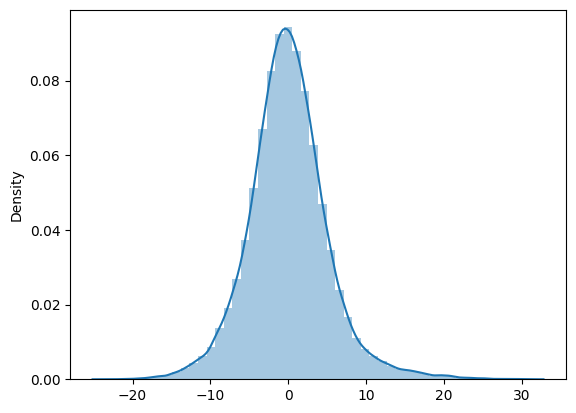

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
y_train_pred = lr_rfe.predict(x_train_sm)
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

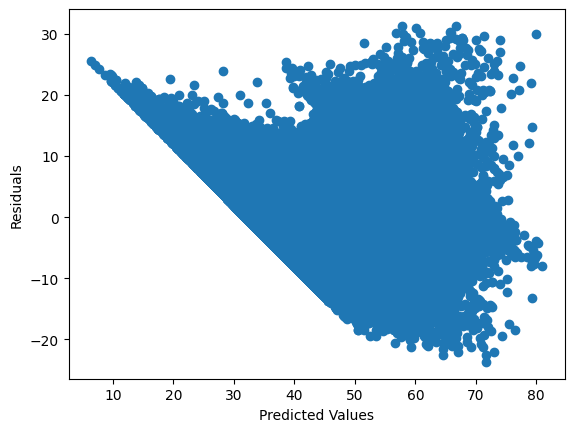

In [ ]:
# plot residuals vs predicted values
plt.scatter(y_train_pred, res)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

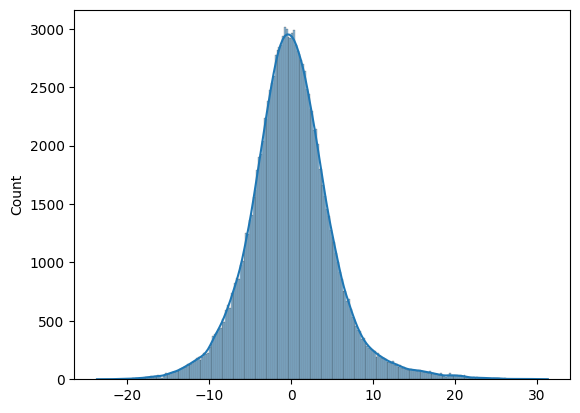

In [ ]:
# residual histogram
sns.histplot(res, kde=True)
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model
scaled_coef = lr_rfe.params[1:]

# Get the names of the features selected by RFE
selected_features = X_train_rfe.columns

# Identify numerical columns among the selected features
numerical_selected_features = X[selected_features].select_dtypes(include=['number']).columns
numerical_selected_features = numerical_selected_features.drop('total_items')
# Calculate the feature range using the original X data, only for the numerical selected features
feature_range = X[numerical_selected_features].max() - X[numerical_selected_features].min()

# Align scaled_coef with the numerical selected features
scaled_coef_numerical = scaled_coef[numerical_selected_features]

In [ ]:
unscaled_coef_numerical = scaled_coef_numerical / feature_range

In [ ]:
scaled_coef_numerical

subtotal                     9.598983
num_distinct_items           2.601345
max_item_price               1.233804
total_busy_dashers         -47.876789
total_outstanding_orders    49.447271
distance                    22.186047
hour                        -4.277111
dtype: float64

In [ ]:
unscaled_coef_numerical

subtotal                    0.000358
num_distinct_items          0.136913
max_item_price              0.000084
total_busy_dashers         -0.301112
total_outstanding_orders    0.169922
distance                    0.265638
hour                       -0.185961
dtype: float64

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'
coef_df = pd.DataFrame({'Feature': numerical_selected_features, 'Scaled Coefficient': scaled_coef_numerical, 'Unscaled Coefficient': unscaled_coef_numerical})
coef_df

Feature  Scaled Coefficient  \
subtotal                                  subtotal            9.598983   
num_distinct_items              num_distinct_items            2.601345   
max_item_price                      max_item_price            1.233804   
total_busy_dashers              total_busy_dashers          -47.876789   
total_outstanding_orders  total_outstanding_orders           49.447271   
distance                                  distance           22.186047   
hour                                          hour           -4.277111   

                          Unscaled Coefficient  
subtotal                              0.000358  
num_distinct_items                    0.136913  
max_item_price                        0.000084  
total_busy_dashers                   -0.301112  
total_outstanding_orders              0.169922  
distance                              0.265638  
hour                                 -0.185961

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

yes there are categorical variable in data. like market_id , store_primary_categoery , order_protocol

---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> test_size = 0.2 refers that out of total data 20 percent data is for testing.







---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>According to heatmap distance has the highest corelation with target variable.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>To detect the outlier and restrict them to lower & upper whisker



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>based on final model total_outstanding_orderes , distance , total_busy_dasheres. top 3 features significantly affecting delivery time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


linear regression interprits the linear relationship between dependent & independent variable. it finds the best fit line between predicted & actual value with minimising errors. minimising errors with gradient decent optimization.equation of straight line y = mx + c . it determines the coeficients of all the independent variable with their significance level P value.

---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>In simple linear regression only one dependent & one independent vbariable. in multiple linear regression one dependent or target variable & more than one independent variable.simple linear regression much easy to understand & multiple linear regression is more complex. in simple linear regression slop(m) shows the change in Y with increase in x . in multiple linear regression each coeficient will show the change in Y while keeping other coeficient constant. in simple linear regression there is no issue of multicolinearity as only one predictor variable. in multiple linear regression multicolinearity is issue if the predictor variables are corelated .



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


cost function measures the how well the model prediction matches the actual values of dependent variable. it will define the error between the predicted & actual values of dependent variable. the techinque used to minimise the cost function are 1. Normal equation , 2.Gradient decent optimization.

---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

overfitting occurs when the model learns the training data so well almost covering all the data point. captures all the noise and random fluctuations rather than just underlying the pattern. in case of overfitting mopdel perform well on training data but produce error on testing data. underfitting happens when model is too simple to capture underlying pattern structure of data . poor performance on both training as well as testing data.

---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>residual plots help in dignosing whether error is normally distributed with mean zero standard deviation is one.helps to determine non linearity.


#### **6.3 Finish task**

Summarize the findings from the coefficient analysis and the residual analysis.

### Summary of Findings

**Coefficient Analysis:**

Based on the scaled and unscaled coefficients, the most significant factors influencing delivery time are:

*   **Total Outstanding Orders:** A higher number of outstanding orders is strongly associated with increased delivery time. This makes intuitive sense as more pending orders would likely lead to increased workload and delays for delivery partners.
*   **Total Busy Dashers:** A higher number of busy dashers is associated with decreased delivery time. This suggests that having more delivery partners available, even if currently busy, helps in reducing delivery times, likely due to better capacity management and dispatching.
*   **Distance:** As expected, increased distance between the restaurant and the customer leads to longer delivery times.

Other numerical features like `subtotal`, `num_distinct_items`, `max_item_price`, and `hour` also have an impact, but their influence on delivery time is less pronounced compared to the top three.

**Residual Analysis:**

The residual plots (histogram and scatter plot of residuals vs predicted values) provide insights into the model's performance and the assumptions of linear regression:

*   **Residual Histogram:** The histogram of residuals shows a distribution that is somewhat bell-shaped, suggesting that the errors are approximately normally distributed around zero. However, there might be some slight skewness or heavier tails, indicating that the model's errors are not perfectly normal.
*   **Residuals vs. Predicted Values Plot:** The scatter plot of residuals against predicted values shows a relatively random scatter of points around zero, which is a good indication that the linear model is appropriate and there are no obvious non-linear patterns that the model is failing to capture. However, there might be some heteroscedasticity (unequal variance of residuals) visible as a fanning-out or fanning-in pattern, suggesting that the model's errors might not be constant across all predicted values.

Overall, the model captures a significant portion of the variance in delivery time (indicated by the R-squared value), and the relationships identified through the coefficient analysis are largely intuitive. The residual analysis suggests that while the linear model is a reasonable fit, there might be some areas for improvement, such as addressing potential non-normality or heteroscedasticity in the residuals, which could further enhance the model's accuracy and reliability.